# Tensorflow Linear Regerssion

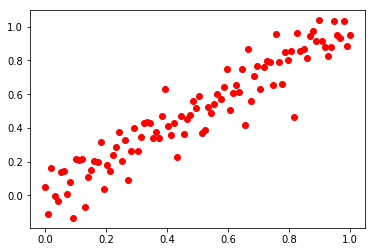

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1234)

N = 100
x = np.linspace(0., 1., N)[:,None]
y = x + np.random.normal(0, 0.1, N)[:,None]
plt.plot(x,y, 'ro')
plt.show()

In [5]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


It: 0, Loss: 9.53e-02
It: 100, Loss: 6.70e-02
It: 200, Loss: 5.25e-02
It: 300, Loss: 4.05e-02
It: 400, Loss: 3.11e-02
It: 500, Loss: 2.41e-02
It: 600, Loss: 1.91e-02
It: 700, Loss: 1.57e-02
It: 800, Loss: 1.34e-02
It: 900, Loss: 1.19e-02
It: 1000, Loss: 1.10e-02
It: 1100, Loss: 1.05e-02
It: 1200, Loss: 1.02e-02
It: 1300, Loss: 1.00e-02
It: 1400, Loss: 9.97e-03
It: 1500, Loss: 9.94e-03
It: 1600, Loss: 9.92e-03
It: 1700, Loss: 9.91e-03
It: 1800, Loss: 9.91e-03
It: 1900, Loss: 9.91e-03
It: 2000, Loss: 9.91e-03
It: 2100, Loss: 9.91e-03
It: 2200, Loss: 9.91e-03
It: 2300, Loss: 9.91e-03
It: 2400, Loss: 9.91e-03
It: 2500, Loss: 9.91e-03
It: 2600, Loss: 9.91e-03
It: 2700, Loss: 9.91e-03
It: 2800, Loss: 9.91e-03
It: 2900, Loss: 9.91e-03
It: 3000, Loss: 9.91e-03
It: 3100, Loss: 9.91e-03
It: 3200, Loss: 9.91e-03
It: 3300, Loss: 9.91e-03
It: 3400, Loss: 9.91e-03
It: 3500, Loss: 9.91e-03
It: 3600, Loss: 9.91e-03
It: 3700, Loss: 9.91e-03
It: 3800, Loss: 9.91e-03
It: 3900, Loss: 9.91e-03
It: 4000, Lo

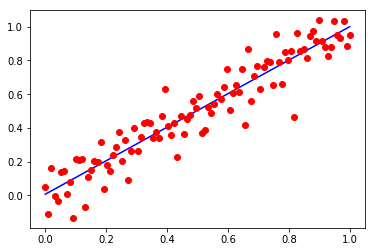

In [6]:
X = tf.placeholder(tf.float32, shape=(N, 1))
Y = tf.placeholder(tf.float32, shape=(N, 1))

W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

Y_pred = tf.multiply(X, W)  + b 

loss = tf.reduce_mean((Y - Y_pred) ** 2)

learning_rate = 0.001
iterations = 5000

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer =tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer() 

with tf.Session() as sess:
    sess.run(init) 
    for epochs in range(iterations):
        _, Loss = sess.run([optimizer, loss], feed_dict = {X : x, Y : y})
        if epochs % 100 == 0:
#            weight = sess.run(W)
 #           bias = sess.run(b)
            print('It: %d, Loss: %.2e' % (epochs, Loss))
            
    Y_p = sess.run(Y_pred, feed_dict = {X : x})
    plt.plot(x, Y_p,'b-')
    plt.plot(x, y,'ro')
    plt.show()
            

# Pytorch Linear Regression

In [2]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
np.random.seed(1234)

N = 100
x = np.linspace(0., 1., N)[:,None]
y = x + np.random.normal(0, 0.1, N)[:,None]
plt.plot(x,y, 'ro')
plt.show()

<Figure size 640x480 with 1 Axes>

It: 0, Loss: 8.41e-02
It: 100, Loss: 4.70e-02
It: 200, Loss: 3.81e-02
It: 300, Loss: 3.15e-02
It: 400, Loss: 2.64e-02
It: 500, Loss: 2.25e-02
It: 600, Loss: 1.96e-02
It: 700, Loss: 1.73e-02
It: 800, Loss: 1.55e-02
It: 900, Loss: 1.42e-02
It: 1000, Loss: 1.32e-02
It: 1100, Loss: 1.24e-02
It: 1200, Loss: 1.18e-02
It: 1300, Loss: 1.14e-02
It: 1400, Loss: 1.10e-02
It: 1500, Loss: 1.08e-02
It: 1600, Loss: 1.06e-02
It: 1700, Loss: 1.04e-02
It: 1800, Loss: 1.03e-02
It: 1900, Loss: 1.02e-02
It: 2000, Loss: 1.01e-02
It: 2100, Loss: 1.01e-02
It: 2200, Loss: 1.00e-02
It: 2300, Loss: 1.00e-02
It: 2400, Loss: 9.99e-03
It: 2500, Loss: 9.97e-03
It: 2600, Loss: 9.95e-03
It: 2700, Loss: 9.94e-03
It: 2800, Loss: 9.94e-03
It: 2900, Loss: 9.93e-03
It: 3000, Loss: 9.93e-03
It: 3100, Loss: 9.92e-03
It: 3200, Loss: 9.92e-03
It: 3300, Loss: 9.92e-03
It: 3400, Loss: 9.92e-03
It: 3500, Loss: 9.91e-03
It: 3600, Loss: 9.91e-03
It: 3700, Loss: 9.91e-03
It: 3800, Loss: 9.91e-03
It: 3900, Loss: 9.91e-03
It: 4000, Lo

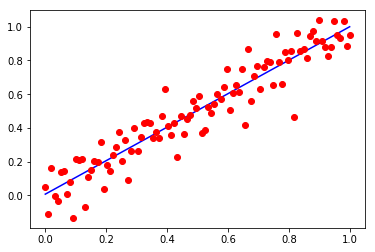

In [3]:
X = torch.from_numpy(x).type(torch.FloatTensor)
Y = torch.from_numpy(y).type(torch.FloatTensor)

class Linear_Layer(torch.nn.Module):
    def __init__(self):
        super(Linear_Layer, self).__init__()
        self.linear = torch.nn.Linear(1, 1) 
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
def compute_loss(X, Y):
    Y_pred = FCL(X)
    return torch.mean((Y - Y_pred)**2)

FCL = Linear_Layer()

learning_rate = 0.01
iterations = 5000
optimizer = torch.optim.SGD(FCL.parameters(), lr = learning_rate)

for epochs in range(iterations):
    loss = compute_loss(X, Y)
    # Zero gradients
    optimizer.zero_grad()
    # perform backward pass
    loss.backward()
    # update weights
    optimizer.step()
    if epochs % 100 == 0:
        print('It: %d, Loss: %.2e' % (epochs, loss))
    
Y_pred = FCL(X)
Y_p = Y_pred.cpu().data.numpy()
plt.plot(x, Y_p,'b-')
plt.plot(x, y,'ro')
plt.show()
